<a href="https://colab.research.google.com/github/monclai/bootcamp_dataScience_aplicada_alura_desafios/blob/main/desafio_final/modelo_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

In [3]:
!pip install yellowbrick

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from yellowbrick.features.importances import FeatureImportances
from yellowbrick.classifier import ROCAUC
#from featurewiz import featurewiz
from joblib import dump, load

In [5]:
class dataSetting:

  def feature_importances (self, dados, modelo):

    '''
    Essa função retorna um gráfico que mostras
    para quais features o modelo dá maior importância
    '''

    #Definindo x e y
    x = dados.drop(['ICU'], axis=1) 
    y= dados['ICU']

    np.random.seed(91824673) #para garantir a reprodutibilidade

    #Separando os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

    #Treino
    modelo.fit(x_train,y_train)

    #Predição
    predicao_dados = modelo.predict(x_test)

    fig,ax = plt.subplots(figsize=(10,20))

    fi_viz = FeatureImportances(modelo)
    fi_viz.fit(x_test,y_test)

    fi_viz.poof()

  def acuracia(self, dados, modelo):

    '''
    Essa função faz o treino e predição dos dados
    e retorna o valor de acurácia do modelo
    '''

    #Definindo x e y
    x = dados.drop(['ICU'], axis=1) 
    y= dados['ICU']

    np.random.seed(727356) #para garantir a reprodutibilidade

    #Separando os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

    #Treino
    modelo.fit(x_train,y_train)

    #Predição
    prediction = modelo.predict(x_test)

    print(f"A acurácia do Modelo é de: {(accuracy_score(y_test, prediction))*100 :.2f} %")

  

  def confusion_matrix(self, dados, modelo):

    '''
    Essa função retorna a matriz de confusão
    com os valores normalizados
    '''

    #Definindo x e y
    x = dados.drop(['ICU'], axis=1) 
    y= dados['ICU']

    np.random.seed(727356) #para garantir a reprodutibilidade

    #Separando os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

    #Treino
    modelo.fit(x_train,y_train)

    #Predição
    predicao_dados = modelo.predict(x_test)

    #Plotando a matriz de confusão
    fig, ax = plt.subplots(figsize=(7,7))
    plot_confusion_matrix(modelo, x_test, y_test, normalize='true',ax=ax, display_labels=['Não precisa \n de internação','UTI'], cmap=plt.cm.Blues)
    ax.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")
    ax.set_xlabel("Label predita", fontsize=18)
    ax.set_ylabel("Label verdadeira", fontsize=18)
    plt.grid(False)
    plt.show()

  def roda_modelo(self, dados, modelo):

    '''
    Essa função treina os dados e faz a predição, retornando
    o valor de AUC e o Classfication Report
    '''

    #Definindo x e y
    x = dados.drop(["ICU"], axis=1)
    y = dados["ICU"]

    np.random.seed(727356) #para garantir a reprodutibilidade
  
    #Separando os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, stratify=y)

    #Treino
    modelo.fit(x_train, y_train)

    #Predição
    predicao = modelo.predict(x_test)

    #Obtendo valor de AUC e classification report
    prob_predict = modelo.predict_proba(x_test)

    auc = roc_auc_score(y_test, prob_predict[:,1])
    print(f"AUC {auc}")
    print("\nClassification Report\n")
    print(classification_report(y_test, predicao))

    
  def plotar_roc_auc(self, dados, modelo):

    '''
    Essa função plota o gráfico da Curva ROC
    '''

    #Definindo x e y
    x = dados.drop(["ICU"], axis=1)
    y = dados["ICU"]
    
    np.random.seed(727356) #para garantir a reprodutibilidade
  
    #Separando os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, stratify=y)

    #Treino
    modelo.fit(x_train, y_train) 

    #Predição
    predicao = modelo.predict(x_test)  

    #Plotando o gráfico
    fig, ax = plt.subplots(figsize=(9,9))
    roc_viz = ROCAUC(modelo)
    roc_viz.score(x_test,y_test) #scores que irão aparecer na legenda
    plt.legend()
    ax.set_ylabel("Taxa de verdadeiros positivos - TPR", fontsize=18)
    ax.set_xlabel("Taxa de falsos positivos - FPR", fontsize=18)
    plt.title(f"Curva ROC - Modelo {modelo.__class__.__name__}", fontsize=20, loc='left', weight='bold')
    plt.show()


  def roda_modelo_cv(self, dados, modelo, n_splits, n_repeats):

    '''
    Essa função faz o processo de Cross-validation
    e retorna o valor de AUC médio e os valores dos intervalos
    '''
    
    #Definindo x e y
    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    dados = dados.sample(frac=1).reset_index(drop=True) #dados.sample(frac=1): embaralhamento dos dado
          
    np.random.seed(727356) #para garantir a reprodutibilidade
              
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    resultados=cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
      
    auc_medio = np.mean(resultados['test_score']) #média do AUC - teste
    auc_medio_treino = np.mean(resultados['train_score']) #média do AUC - treino

    auc_std = np.std(resultados['test_score']) #desvio-padrão do teste
      
    print(f"AUC Médio {auc_medio} Intervalo {auc_medio - (2*auc_std)} - {auc_medio + (2*auc_std)}")


  def compara_curvas_roc_(self, x_train, y_train, x_test, y_test, modelos):

    '''
    Essa função plota as curvas ROC dos diferentes modelos 
    para os dados de teste
    '''    

    fig, ax = plt.subplots(figsize=(8,8))

    for modelo in modelos:   
      np.random.seed(73246)
      modelo.fit(x_train, y_train)
      plot_roc_curve(modelo, x_test, y_test, ax=ax)

    ax.grid(linestyle='--')
    ax.set_ylabel("Taxa de verdadeiros positivos - TPR", fontsize=18)
    ax.set_xlabel("Taxa de falsos positivos - FPR", fontsize=18)
    ax.set_title("Comparações de Curvas ROC - Dados de teste", fontsize=16, fontweight="bold")
    ax.legend(bbox_to_anchor=(1,1), fontsize="large", title="Classificadores:", title_fontsize=16, labelspacing=0.8);


  def grid_search_cv(self,parametros, modelo, x_train, y_train):
    '''
    Essa função faz com o que o GriSearchCV retorne
    os melhores hiperparâmetros para determinado modelo.
    Basta criar um dicionário com os hiperparâmetros que deseja-se
    testar e informar qual modelo será testado
    '''

    #Determinando o modelo e quais parâmetros serão adicionados
    modelo_grid = GridSearchCV(modelo, param_grid=parametros, cv=5, scoring="roc_auc")

    #Treino
    modelo_grid.fit(x_train, y_train)

    #Obtenção dos melhores valores para cada parâmetro
    best_params = modelo_grid.best_params_

    return best_params

In [6]:
funcoes = dataSetting()

# Importação dos dados

In [7]:
dataset_url = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_final/dados/data_clear_covid.csv'

dataset = pd.read_csv(dataset_url)

In [8]:
dataset.head(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,...,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.18,-1.00,-0.87,-1.00,-0.74,-1.00,-0.95,-1.00,-0.89,-1.00,0.09,-1.00,-1.00,-0.93,...,-1.00,0.36,-1.00,-0.54,-1.00,-0.52,-1.00,0.94,-1.00,0.35,-1.00,-0.03,-1.00,-1.00,-1.00,-0.99,-1.00,-0.83,-1.00,-0.84,-1.00,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,-0.50,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1
1,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.91,-1.00,-0.74,-1.00,-0.96,-1.00,-0.78,-1.00,0.14,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.40,-1.00,-0.70,-1.00,0.94,-1.00,0.35,-1.00,0.09,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.84,-1.00,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.71,-0.44,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.75,-0.96,1
2,0,3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.97,-1.00,-1.00,-1.00,0.33,-1.00,-0.97,-1.00,-0.19,-1.00,-0.32,-1.00,-0.89,-1.00,-0.20,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.56,-1.00,-0.78,-1.00,0.94,-1.00,0.58,-1.00,0.20,-1.00,-0.99,-1.00,-0.96,-1.00,-0.85,-1.00,-0.94,-1.00,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,-0.36,-0.30,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0
3,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.91,-1.00,-0.83,-1.00,-0.94,-1.00,-0.85,-1.00,0.36,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.46,-1.00,-0.59,-1.00,0.94,-1.00,0.35,-1.00,0.14,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.90,-1.00,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,-0.57,-0.08,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-0.96,-0.98,0
4,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.89,-1.00,-0.74,-1.00,-0.96,-1.00,-0.89,-1.00,0.29,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.29,-1.00,-0.67,-1.00,0.94,-1.00,0.35,-1.00,0.09,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.88,-1.00,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.43,-0.25,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.99,-0.98,0


# Definição dos dados

Separação dos dados de entrada e saída

In [9]:
x = dataset.drop(['ICU'], axis = 'columns')
y = dataset['ICU']

# Modelagem de Machine Learning

## Lazyclassifier

Para se ter uma visão inicial de como cada modelo irá se comportar com a base de dados, será utilizado o Lazyclassifier.

In [10]:
np.random.seed(91824673)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test) 
'''"
clf" está retornando dois valores, Modelo e Previsão, enquanto modelo significa 
todos os modelos e com algumas métricas e previsão significa todo o valor previsto que é ŷ
'''
models

100%|██████████| 29/29 [00:02<00:00, 13.85it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.83,0.83,0.83,0.83,0.27
ExtraTreesClassifier,0.79,0.78,0.78,0.79,0.15
NearestCentroid,0.77,0.78,0.78,0.77,0.04
LGBMClassifier,0.77,0.77,0.77,0.77,0.07
LogisticRegression,0.77,0.77,0.77,0.77,0.08
LinearSVC,0.77,0.77,0.77,0.77,0.13
RidgeClassifierCV,0.76,0.76,0.76,0.76,0.03
BernoulliNB,0.75,0.75,0.75,0.75,0.02
SVC,0.75,0.74,0.74,0.74,0.06


# Análise dos modelos

Como já esperado, muitos testes realizados com essa base de dados demonstrou que o modelo `XGBClassifier` costuma ter melhores resultados.

In [11]:
modelo_xgboost = XGBClassifier()

# Buscando features de maior importância





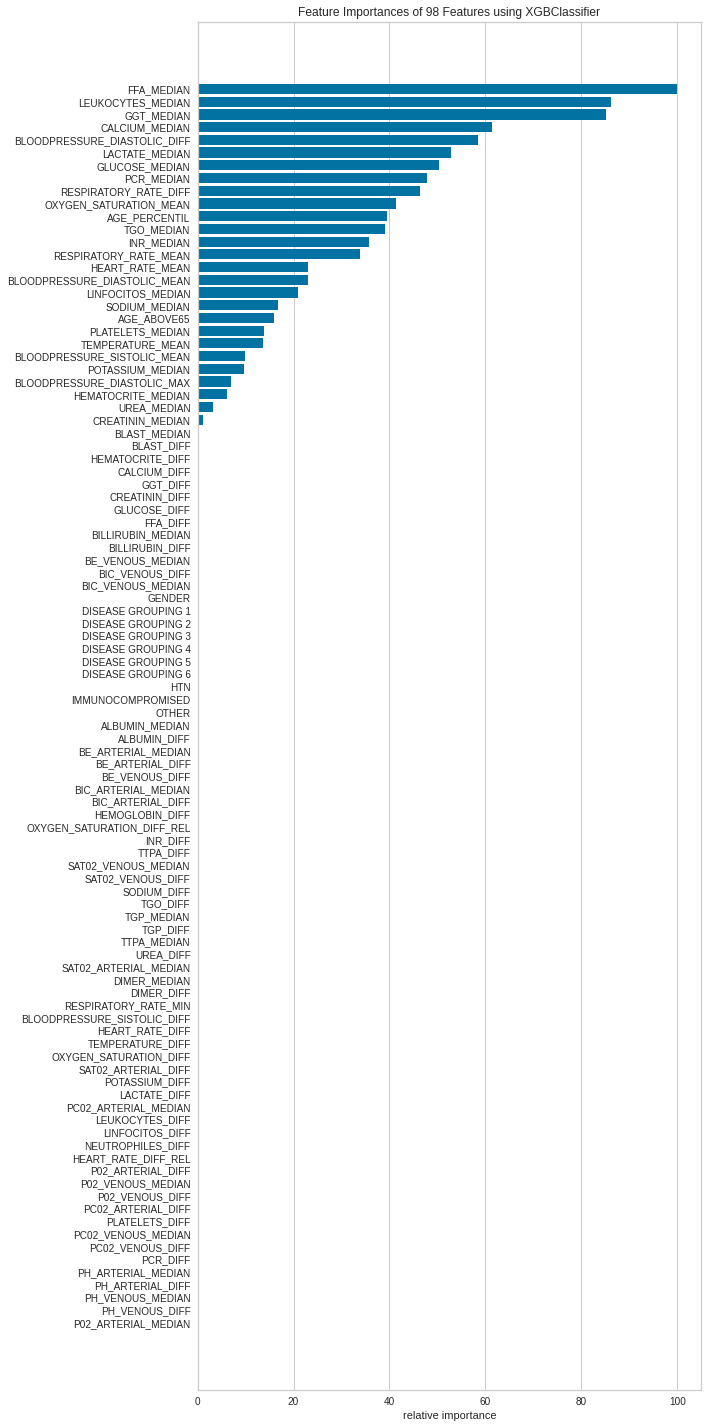

In [12]:
funcoes.feature_importances(dataset, modelo_xgboost)

# Averiguando a acuracia

O modelo apresenta uma acuracia próximo à 1.5σ.

In [13]:
funcoes.acuracia(dataset, modelo_xgboost)

A acurácia do Modelo é de: 83.10 %


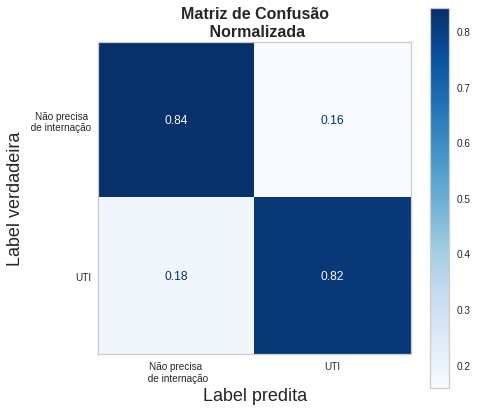

In [14]:
funcoes.confusion_matrix(dataset, modelo_xgboost)

Através da matriz de confusão podemos ver que o número de falsos negativos é relativamente baixo, sendo FN = 0,18.

In [15]:
funcoes.roda_modelo(dataset, modelo_xgboost)

AUC 0.8301435406698565

Classification Report

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.81      0.64      0.71        33

    accuracy                           0.76        71
   macro avg       0.77      0.75      0.75        71
weighted avg       0.77      0.76      0.76        71



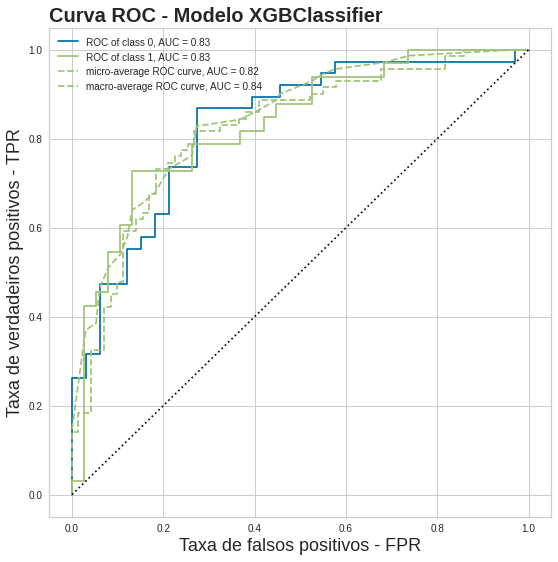

In [16]:
funcoes.plotar_roc_auc(dataset, modelo_xgboost)

# Modelo de cross-validation

Utilizando o modelo de cross-validation, podemos ver que o AUC médio também apresenta um ótimo resultado

In [17]:
funcoes.roda_modelo_cv(dataset, modelo_xgboost, 8, 20)

AUC Médio 0.7904919610507246 Intervalo 0.6769879310718337 - 0.9039959910296155


#Resultado

Observando os resultados dos testes, podemos perceber que o modelo `XGBClassifier` retorna resultados otimistas, tanto em relação a precisão quando em relação a acurácia.